In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from dbfread import DBF
import pandas as pd
import numpy as np
from pandas import DataFrame
import shelve
import seaborn as sns
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', 100)

In [20]:
fatal_crashs = pd.read_hdf('results/fatal_crashs.h5', 'fatal_crashs')
accidents = pd.read_hdf('results/accidents.h5', 'accidents')

In [3]:
fatal_crashs['DRUNK_DRIVE'].value_counts()

0.0    1097422
1.0     346693
2.0      25999
5.0      12758
3.0       2149
4.0        742
6.0         49
7.0         23
9.0          9
Name: DRUNK_DRIVE, dtype: int64

In [4]:
fatal_crashs['DRUNK_INDICATOR']=fatal_crashs['DRUNK_DRIVE'].where(fatal_crashs['DRUNK_DRIVE'] <= 1, 1)
fatal_crashs['DRUNK_INDICATOR'].value_counts()

0.0    1097422
1.0     388422
Name: DRUNK_INDICATOR, dtype: int64

In [106]:
accidents['DRUNK_INDICATOR']=accidents['DRUNK_DRIVE'].where(accidents['DRUNK_DRIVE'] <= 1, 1)
Death_by_year=accidents.groupby('YEAR',as_index=False)['FATALS'].sum()
Death_by_year_Alcohol =accidents[accidents.DRUNK_INDICATOR >= 1].groupby('YEAR',as_index=False)['FATALS'].sum()
Death_by_year['Fatal Involved Alcohol']= Death_by_year_Alcohol['FATALS']
Death_by_year

,YEAR,FATALS,Fatal Involved Alcohol
0,2007,41259.0,15249.0
1,2008,37423.0,12309.0
2,2009,33883.0,11194.0
3,2010,32999.0,10625.0
4,2011,32479.0,10186.0
5,2012,33782.0,10553.0
6,2013,32893.0,10191.0
7,2014,32744.0,9747.0
8,2015,35485.0,10245.0
9,2016,37461.0,9731.0


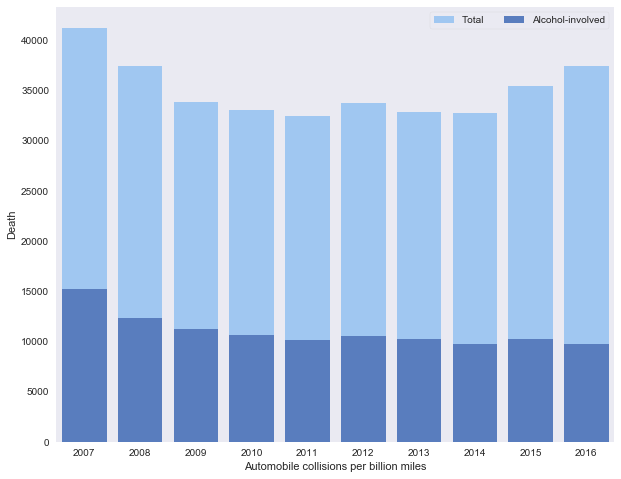

In [105]:
f, g = plt.subplots(figsize=(10, 8))
# Plot the total deadth
sns.set_color_codes("pastel")
g = sns.barplot(x="YEAR",y="FATALS",data=Death_by_year,label="Total", color="b")
# Plot the total deadth where alcohol was involved
sns.set_color_codes("muted")
g = sns.barplot(x="YEAR", y="Fatal Involved Alcohol", data=Death_by_year,
            label="Alcohol-involved", color="b")
# Add a legend and informative axis label
g.legend(ncol=2, frameon=True)
g.set( ylabel="Death",xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [5]:
#since data before 2009 do not contain information of whether the driver speeding or not, so we select data from after 2009
fatal_crashs_since2009=fatal_crashs.loc[fatal_crashs['YEAR'] >= 2009]
fatal_crashs_since2009['SPEEDING_INDICATOR']=fatal_crashs_since2009['SPEEDING'].where(fatal_crashs_since2009['SPEEDING'] <= 1, 1)
fatal_crashs_since2009['SPEEDING_INDICATOR'].value_counts()

/Users/aitingkuang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.0    911165
1.0    220549
Name: SPEEDING_INDICATOR, dtype: int64

In [6]:
no_trains=fatal_crashs_since2009[(fatal_crashs_since2009.SPEED <= 200)& (fatal_crashs_since2009.SEX <= 2)]
no_trains.head()

,STATE,YEAR,CASE_NUM,HIT_RUN,SPEED,ROLLOVER,FIRE,SPEEDING,DEATHS,NUM_VEHICLE,PERSONS,FATALS,MONTH,DAY_WEEK,HOUR,HIGHWAY,LATITUDE,LONGITUD,COLLISION_TYPE,LIGHT_CONDITION,WEATHER,ARR_HOUR,ARR_MIN,CRASH_FACTOR,DRUNK_DRIVE,AGE,SEX,RACE,DRUNK_INDICATOR,SPEEDING_INDICATOR
354130,10,2009,100001,0.0,50.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,January,Saturday,1.0,Off,39.6102,-75.7064,Not Collision,Dark,1.0,2.0,3.0,0.0,0.0,33.0,1.0,1.0,0.0,1.0
354131,10,2009,100001,0.0,50.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,January,Saturday,1.0,Off,39.6102,-75.7064,Not Collision,Dark,1.0,2.0,3.0,0.0,0.0,29.0,2.0,0.0,0.0,1.0
354132,10,2009,100002,0.0,50.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,January,Saturday,16.0,Off,39.6752,-75.7040,"Sideswipe, Same Direction",Daylight,1.0,16.0,34.0,0.0,0.0,71.0,2.0,1.0,0.0,0.0
354133,10,2009,100002,0.0,50.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,January,Saturday,16.0,Off,39.6752,-75.7040,"Sideswipe, Same Direction",Daylight,1.0,16.0,34.0,0.0,0.0,70.0,1.0,1.0,0.0,0.0
354134,10,2009,100002,0.0,50.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,January,Saturday,16.0,Off,39.6752,-75.7040,"Sideswipe, Same Direction",Daylight,1.0,16.0,34.0,0.0,0.0,41.0,1.0,0.0,0.0,0.0


In [7]:
no_trains['SEX'].value_counts()

1.0    302824
2.0    169628
Name: SEX, dtype: int64

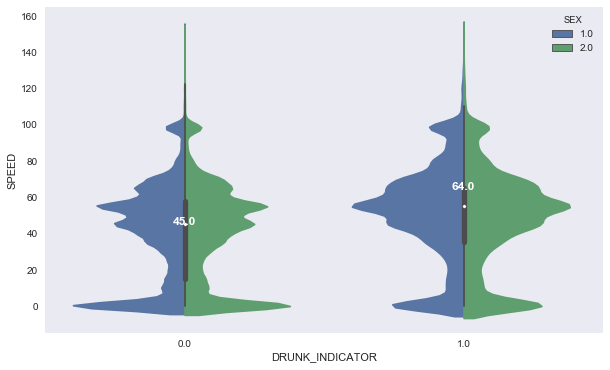

In [8]:
Drunk_Speeding=sns.violinplot(data=no_trains, x="DRUNK_INDICATOR", y="SPEED",
               hue="SEX", split=True)
medians = no_trains.groupby(['SPEEDING_INDICATOR'])['SPEED'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,Drunk_Speeding.get_xticklabels()):
   Drunk_Speeding.text(pos[tick], medians[tick] + 0.05, median_labels[tick], horizontalalignment='center', color='w', weight='semibold')